In [1]:
import os
import charts_function_list

In [2]:
#folder setup
base_path, data, outputs = charts_function_list.folder_setup()

In [3]:
os.chdir(data)
dc_ratings = pd.read_csv('dc_movie_ratings.csv') #pull data

In [4]:
#olor map
colors = {'WB Batman':'#238b45', 
         'Dark Knight Trilogy':'#252525', 
         'DC Extended Universe':'#084594', 
         'Superman':'#ef3b2c',  
         'Other':'#feb24c'}

dc_ratings['color']=dc_ratings['Franchise'].map(colors)

In [5]:
#only some columns
dc_ratings = dc_ratings[['Movie','Franchise','Release Date','IMDB rank','RT Rank','Metacritic Rank','Release Rank','color']].set_index(('Movie'))

In [6]:
#sort
sorted_titles = dc_ratings.sort_values(by='IMDB rank').reset_index()['Movie'].values

In [7]:
#separate frames transposed
ratings = dc_ratings[['IMDB rank','RT Rank','Metacritic Rank']].T
colors = dc_ratings[['color']].T
franchises = dc_ratings[['Franchise']].T

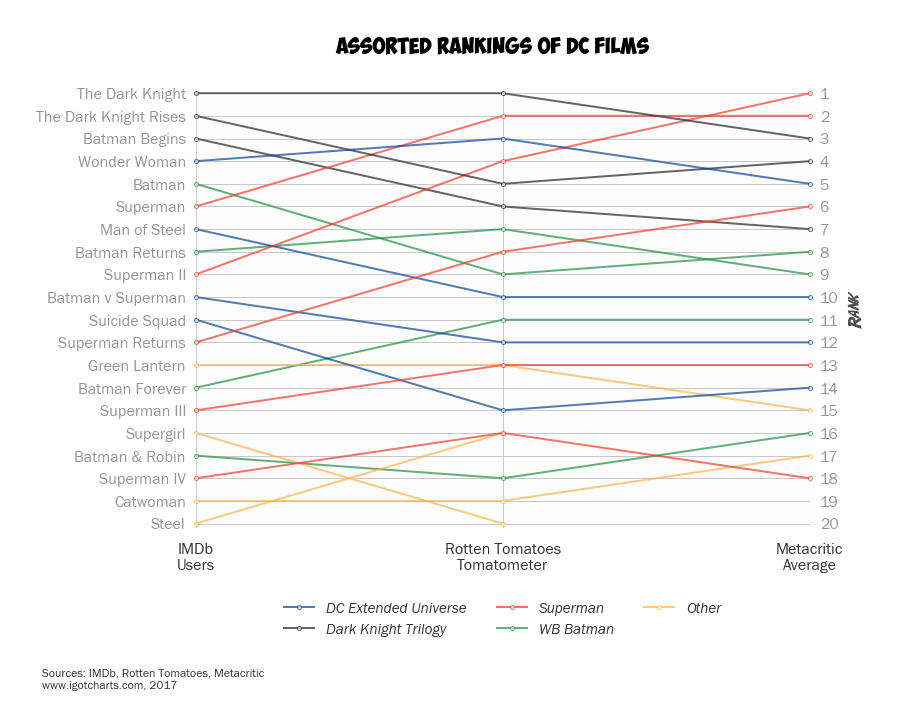

In [20]:
chart = charts_function_list.chart_maker(title='Assorted Rankings of DC Films',title_size=24)
fig = chart.initial_fig_axis(figsize=(11,8))
ax = chart.axes_set_up(fig=fig)
fig.suptitle(chart.title,fontname='ObelixPro')
#create plots
for item in range(20):
    plt.plot([0,.25,.5],ratings.iloc[:,item],color=colors.T.iloc[item,0],linewidth=2,marker='o',markersize=4,markerfacecolor='white',label=franchises.T.iloc[item,0],clip_on=False,alpha=.7)

#set limits and interval for x-axis
chart.x_axis_setup(ax,0,.5,.25)
ax2 = ax.twinx()

#add a light patch
chart.patch_adder(ax,alpha=.1)
ax.grid(alpha=.8)

#set custome tick labels
ax.set_xticklabels(['','IMDb\nUsers','Rotten Tomatoes\nTomatometer','Metacritic\nAverage'],
                   position=(.5,-.06),va='center',alpha=.8,fontsize=16)
ax.set_yticklabels(np.append('',sorted_titles))

#invert axes and set tick formatting
for item in (ax,ax2):
    chart.y_axis_setup(item,1,20.2,1)
    item.invert_yaxis()
    item.tick_params(axis='y',pad=10,labelsize=16, labelcolor='#969696')
    

ax2.set_ylabel('Rank',fontsize=18,alpha=.7,fontname='Adventure')
chart.citations(ax,x=-.25, source_y=-0.34, chart_tag_y=-0.37,fontsize=12, 
                source='Sources: IMDb, Rotten Tomatoes, Metacritic',chart_tag='www.igotcharts.com, 2017',alpha=.8)

#legend handling
#handles, labels = ax.get_legend_handles_labels()
frame = pd.DataFrame(pd.DataFrame(np.array(ax.get_legend_handles_labels()).T,columns=('handles','labels'))).drop_duplicates(subset='labels').reset_index(drop=True)

#sort in alphabetical order and then remove other and place to the end
frame = frame.sort_values(by='labels')
other = frame.iloc[frame[frame['labels']=='Other'].index-1,:]
frame = pd.concat([frame.drop(other.index),other])
legend = ax.legend(labels=list(frame['labels'].values),handles=list(frame['handles'].values),bbox_to_anchor=(.5,-.21),ncol=3,loc=10,fontsize=15)

#set legend properties
for text in legend.get_texts():
    text.set_color('Black')
    text.set_alpha(.8)
    text.set_style('italic')
    
os.chdir(outputs)
charts_function_list.chart_save('DC_film_comparison')

plt.show()